In [1]:
#Importing Data from the CSV file
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import sys

os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q2")
print("Path has been changed to:\n", os.getcwd())

#Importing Data X from the CSV file
temp = np.genfromtxt('q2test.csv', delimiter=',')
#print(temp[1:])

X1_test = temp[1:, 0].reshape(-1,1)
X2_test = temp[1:, 1].reshape(-1,1)
Y_test = temp[1:, 2].reshape(-1,1)
X0_test = np.ones((X1_test.shape))
X_test = np.append(X0_test, X1_test, axis=1)
X_test = np.append(X_test, X2_test, axis=1)

num_test = X_test.shape[0]
os.chdir("/home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques2")
print("Path changed back to python file directory:\n", os.getcwd())

Path has been changed to:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/data/q2
Path changed back to python file directory:
 /home/ayushi/coursework/col774/Machine-Learning-Assignments/Assignment1/ques2


In [2]:
#given as input
m = 1000000
x0 = np.ones((m,1)) #Intercept term

#Sample X1 ~ N(3,4) and sample X2 ~ N(-1, 4)
x1 = np.random.normal(3, 2, m).reshape(-1,1)
x2 = np.random.normal(-1, 2, m).reshape(-1,1)

#Make a 1Mx3 matrix
X = np.append(x0,x1,axis=1)
X = np.append(X, x2, axis=1)
print("The number of training samples to be generated is {}".format(m))

The number of training samples to be generated is 1000000


In [3]:
#Sample epsilon error in the data from N(0, 2)
epsilon = np.random.normal(0, np.sqrt(2), m).reshape(-1,1)

#Theta is fixed with values 3, 1, 2 for generating the data. 
#We will later use these parameters to vr=erify our hypothesis from SGD. 
theta = np.array([[3], [1], [2]])

In [4]:
#Generate the value of Y (given X, parameterized by given Theta)
Y = np.dot(X,theta) + epsilon

In [5]:
#Data is (X, Y)
#Randomly shuffle the data
temp = np.append(X, Y, axis=1)
#We use random shuffle from numpy to shuffle all the rows of the data
np.random.shuffle(temp)
X = temp[:,0:3]
Y = temp[:,-1:]

In [108]:
#Applying SGD on X, Y to learn hypothesis with parameters theta

#Model Initial Parameters initialized to zeros
theta = np.zeros((3,1))
#Learning Rate (has to be fixed)
alpha = 0.001 

#Batch Size r options stored in an array 
batch_size = np.array([1, 100, 10000, 1000000])

print("The model's initial theta is = {} and the learning rate is = {}".format(theta.T, alpha))

The model's initial theta is = [[0. 0. 0.]] and the learning rate is = 0.001


In [109]:
#define the hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

#Define the cost function over the entire sample/batch
def cost_total(X, theta, Y, m):
    h_x= hypothesis(X, theta)
    cost = (1/(2*m)) * np.sum((Y-h_x)**2) # Average Cost Function
    return cost

#function for calculating the cost function gradient
def cost_grad(X, theta, Y, m):
    temp = np.dot(X, theta)-Y
    theta_grad = np.zeros((3,1))
    theta_grad += np.dot(X.transpose(), temp)
    return theta_grad/m #average Gradient 
    
cost_start = cost_total(X, theta, Y, m)
print("Initial Cost value for the hypothesis with zero parameters={}".format(cost_start))

Initial Cost value for the hypothesis with zero parameters=18.93045800596544


In [110]:
#r is the current batch size (choose between 1, 100, 10000, 1000000 - defined in batch_size array)
r = batch_size[0]
#r = sys.argv[0]

#number of batches (sub batches stored in an array mini_batch)
mini_batch = [(X[i:i+r,:], Y[i:i+r]) for i in range(0, m, r)]
print("The size of one batch is = {} and the number of batches = {}".format(r, len(mini_batch)))
#for b in mini_batch: print(b[1])

The size of one batch is = 1 and the number of batches = 1000000


In [ ]:
import time
start = time.time()

i=0   #Variable for outer loop
J_curr=0.0; #Store the current cost at one (r=1) data point/over r data points
theta_all = theta
#print(theta_all)

J_avg = np.array([cost_total(X[0], theta, Y[0], 1)])
print(J_avg)

#while(np.amax(abs(cost_grad(X, theta, Y, m))) >= 0.0000001):
while(True):
    i+=1
    count = 0
    cost_initial = cost_total(X, theta, Y, m)
    for b in mini_batch:
        X_b = b[0]
        Y_b = b[1]
        J_curr += cost_total(X_b, theta, Y_b, r)
        if(count%10000 == 0 and count!=0):
            J_curr /= 10000; #gives the average cost over 1000 iterations. 
            J_avg = np.append(J_avg, J_curr)
            print("Current average cost = {}".format(J_curr)) 
            J_curr=0.0;  
        theta -= alpha * cost_grad(X_b, theta, Y_b, r)
        theta_all = np.append(theta_all,theta,axis=1)
        count +=1
    cost_final = cost_total(X, theta, Y, m)
    print("Cost is = {} in iterations = {}".format(cost_final, i)) 
    if (abs(cost_final - cost_initial) < 0.01):
        print(cost_final, cost_initial, cost_final-cost_initial)
        break
end = time.time()

print("Cost is = {} in iterations = {} in time = {} sec".format(cost_final, i, end-start))

[77.45425759]
Current average cost = 1.3509999164708772
Current average cost = 1.0149364562602599
Current average cost = 0.9948914809573889
Current average cost = 1.0100137044715634
Current average cost = 1.0021208979104492
Current average cost = 1.0094561678799914
Current average cost = 1.0110930913410154
Current average cost = 1.012783548021434
Current average cost = 0.9822417471167292
Current average cost = 1.048573156517133
Current average cost = 0.9962324232700581
Current average cost = 1.0232347967364588
Current average cost = 1.0010273252436552
Current average cost = 0.9882512805981265
Current average cost = 1.01634774837377
Current average cost = 0.982875782506085
Current average cost = 0.987384982457586
Current average cost = 1.0046682625812722
Current average cost = 1.0275037520426709
Current average cost = 1.0000456092652472
Current average cost = 1.0047353620717026
Current average cost = 1.0056720735099063
Current average cost = 0.9867703971189873
Current average cost = 1.0

In [105]:
theta, count

(array([[2.96817321],
        [1.05034952],
        [2.02341726]]), 697376)

In [106]:
test_err_original = cost_total(X_test, np.array([[3],[1],[2]]), Y_test, num_test)
print("The Test error on Original Hypothesis with theta = 0 is = {}".format(test_err_original))

test_err_learned = cost_total(X_test, theta, Y_test, num_test)
print("The Test error on Learned Hypothesis = {}".format(test_err_learned))

print("The difference in the test error of original and learned hypothesis is = {}".format(test_err_learned-test_err_original))

The Test error on Original Hypothesis with theta = 0 is = 0.9829469215
The Test error on Learned Hypothesis = 1.1307050588896421
The difference in the test error of original and learned hypothesis is = 0.14775813738964216


In [55]:
theta_all_new = theta_all.T[0::15,:]
print(theta_all_new.shape)
print(theta_all_new)

(2028, 3)
[[0.00398488 0.01593896 0.00399232]
 [0.03778144 0.15042368 0.04126843]
 [0.07137345 0.28261582 0.08505058]
 ...
 [2.98776596 1.00190944 1.9993648 ]
 [2.98779695 1.00190267 1.99936707]
 [2.98782785 1.00189592 1.99936933]]


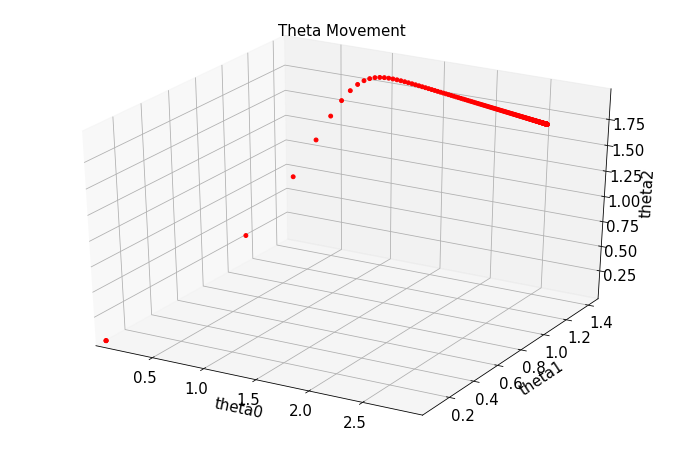

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Theta Movement", fontsize=15)
ax.set_xlabel('theta0', fontsize=15)
ax.set_ylabel('theta1', fontsize=15)
ax.set_zlabel('theta2', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)

graph = ax.scatter([], [], [], marker='o', c='r', s=15)
ax.set_xlim(np.amin(theta_all_new[:,0]), np.amax(theta_all_new[:,0]))
ax.set_ylim(np.amin(theta_all_new[:,1]), np.amax(theta_all_new[:,1]))
ax.set_zlim(np.amin(theta_all_new[:,2]), np.amax(theta_all_new[:,2]))
graph.set_alpha(1)
xdata, ydata, zdata = [], [], []

def animate(i):
    xdata.append(theta_all_new[i,0])
    ydata.append(theta_all_new[i,1])
    zdata.append(theta_all_new[i,2])
    graph._offsets3d = (xdata, ydata, zdata)
    return graph

anim = FuncAnimation(fig, animate, frames=np.arange(0, theta_all_new.shape[0], 10), interval=200, repeat_delay=3000, blit=False)
anim.save('plot_r_100.gif', writer='imagemagick')

# plt.ion()

# for i in range(theta_all_new.shape[0]):
#     ax.scatter(theta_all_new[i,0], theta_all_new[i,1], theta_all_new[i,2], c='r', marker='o', s=50)
#     plt.pause(0.02)
#     plt.draw()

# def calc_y(x1, x2, theta, epsilon, points)
#     h_x = theta[0] +  points.x1*theta[1] + points.x2*theta[2]   
#     points.y = h_x + epsilon
#     return 

# X1, X2 = np.meshgrid(x1, x2)
# Point = collections.namedtuple('Point', ['x1', 'x2', 'y'])
# points = [Point(x1, x2, y)]

# fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(111, projection='3d')
# ax.set_title("Y function", fontsize=15)

# cost_error = np.array([calc_y(x1, x2, theta, points) 
#                for x0, x1 in zip(np.ravel(X1), np.ravel(X2))])
# cost_plot = cost_error.reshape(theta0.shape)


# Y_data = calc_y(X1, X2, )